
#**Best Universities in UK (EDA)** 


# Analysing The DataSet To Find The Best University in UK

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
uni = pd.read_csv("/content/uk_universities.csv")


The describe() function applies basic statistical computations on the dataset like extreme values, count of data points standard deviation, etc. Any missing value or NaN value is automatically skipped.

In [ ]:
uni.describe()

,Founded_year,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),Estimated_cost_of_living_per_year_(in_pounds)
count,131.000000,131.000000,131.00000,84.000000,131.000000,131.000000,131.000000,131.000000
mean,1925.221374,65.900763,1097.59542,73.960714,4.946565,12537.450382,13099.763359,8644.732824
std,139.040187,37.922158,1145.00106,6.351473,0.617850,2555.318861,3106.398149,1579.049538
min,1096.000000,1.000000,2.00000,65.900000,4.000000,8350.000000,6000.000000,5500.000000
25%,1896.000000,33.500000,196.00000,68.675000,4.500000,10758.000000,11250.000000,7710.500000
50%,1966.000000,65.000000,691.00000,72.600000,4.500000,12000.000000,12500.000000,8217.000000
75%,1992.000000,98.000000,1569.00000,77.700000,5.500000,13825.000000,14182.500000,9457.500000
max,2013.000000,131.000000,5253.00000,94.100000,6.500000,23500.000000,29900.000000,15000.000000


To print the first five rows, we will use the head() function. Inorder to get idea of Dataframe structure.

In [ ]:
uni.head()

,University_name,Region,Founded_year,UK_rank,World_rank,CWUR_score,Minimum_IELTS_score,UG_average_fees_(in_pounds),PG_average_fees_(in_pounds),International_students,Student_satisfaction,Student_enrollment,Academic_staff,Control_type,Academic_Calender,Campus_setting,Estimated_cost_of_living_per_year_(in_pounds)
0,University of Cambridge,East of England,1209,1,4,94.1,6.5,21750,23187,20.20%,85.50%,"20,000-24,999","over-5,000",Public,Trimesters,Urban,12000
1,University of Oxford,South East England,1096,2,2,93.3,6.5,21770,19888,16.80%,86.50%,"25,000-29,999","over-5,000",Public,Trimesters,Urban,11500
2,University of St Andrews,Scotland,1413,3,86,75.8,6.5,17040,15440,40.40%,87.90%,"10,000-14,999","1,000-1,499",Public,Semesters,Suburban,12000
3,Imperial College London,London,1907,4,8,86.6,6.5,23500,29900,41.40%,77.90%,"15,000-19,999","4,000-4,499",Public,Continuous,Urban,10700
4,Loughborough University,East Midlands,1966,5,404,72.8,5.5,16400,16400,22.00%,85.80%,"15,000-19,999","1,500-1,999",Public,Semesters,Suburban,9398


Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset, use the dataframe.info() function.

In [ ]:
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 17 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   University_name                                131 non-null    object 
 1   Region                                         131 non-null    object 
 2   Founded_year                                   131 non-null    int64  
 3   UK_rank                                        131 non-null    int64  
 4   World_rank                                     131 non-null    int64  
 5   CWUR_score                                     84 non-null     float64
 6   Minimum_IELTS_score                            131 non-null    float64
 7   UG_average_fees_(in_pounds)                    131 non-null    int64  
 8   PG_average_fees_(in_pounds)                    131 non-null    int64  
 9   International_students                         131 non

# Handling Missing Values

---
Missing Data is a very big problem in real-life scenarios. Missing Data can also refer to as NA (Not Available) values in pandas. 

For handling these missing values there can be several cases like dropping the rows containing NaN or replacing NaN with either mean, median, mode, or some other value.


Dropping the columns that don't play any significance in University selection, decreases the size of dataset considerably, making it easier to handle the DataFrame.

In [ ]:
uni.drop(["Website","Latitude", "Longitude", "Motto"], axis = 1 , inplace = True)

Check if there are any missing values in our dataset or not...

Every column has a different amount of missing values.

In [ ]:
uni.isnull().sum()

University_name                                   0
Region                                            0
Founded_year                                      0
Motto                                            17
UK_rank                                           0
World_rank                                        0
CWUR_score                                       47
Minimum_IELTS_score                               0
UG_average_fees_(in_pounds)                       0
PG_average_fees_(in_pounds)                       0
International_students                            0
Student_satisfaction                              0
Student_enrollment                                0
Academic_staff                                    0
Control_type                                      0
Academic_Calender                                26
Campus_setting                                   18
Estimated_cost_of_living_per_year_(in_pounds)     0
Latitude                                          0
Longitude   

**Filling the Blank rows with mean value of CWUR Score**


In [ ]:
uni.CWUR_score.fillna(73.960714)

0      94.100000
1      93.300000
2      75.800000
3      86.600000
4      72.800000
         ...    
126    73.960714
127    73.960714
128    73.960714
129    73.960714
130    73.960714
Name: CWUR_score, Length: 131, dtype: float64

**We can also fill the Categorical Columns with mode value of that particular column.**

As shown below, Campus Setting is filled with highest frequency values in Column.

In [ ]:
mode = uni['Campus_setting'].mode().values[0]
uni['Campus_setting']= uni['Campus_setting'].replace(np.nan, mode)
uni['Campus_setting']

0         Urban
1         Urban
2      Suburban
3         Urban
4      Suburban
         ...   
126    Suburban
127       Urban
128       Urban
129       Urban
130       Urban
Name: Campus_setting, Length: 131, dtype: object

For proper Data visualization, its important to have an idea of repeating values in the Dataframe. unique() method gives the unique values present in the Dataset.

In [ ]:
uni['Control_type'].unique()

array(['Public', 'Private'], dtype=object)

In [ ]:
uni['Region'].unique()

array(['East of England', 'South East England', 'Scotland', 'London',
       'East Midlands', 'North East England', 'North West England',
       'West Midlands', 'South West England', 'Yorkshire and the Humber',
       'Wales', 'Northern Ireland'], dtype=object)

In [ ]:
uni['University_name'].duplicated().sum()

0

# Data visualization

---



Data Visualization is the process of analyzing data in the form of graphs or maps, making it a lot easier to understand the trends or patterns in the data.

In the given dataset, columns such as Minimum_IELTS_score, UK_rank, World_rank, CMUR Score plays an crucial role in finding the best university.

###Finding Mininum IELTS score for top 50 univeristies in UK

The line graph shows the trend of IELTS Score with respect to the UK ranks

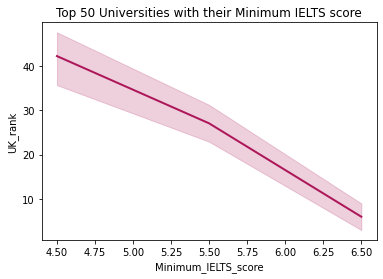

In [ ]:
sns.lineplot(data = uni[:50], y = 'UK_rank' , x = 'Minimum_IELTS_score', linewidth = 2, color='#AD1759' )
sns.set_theme(style = "whitegrid")
plt.title("Top 50 Universities with their Minimum IELTS score")
plt.show()

###Finding Average CWUR Score for Top 50 Universities in UK Using World Rank

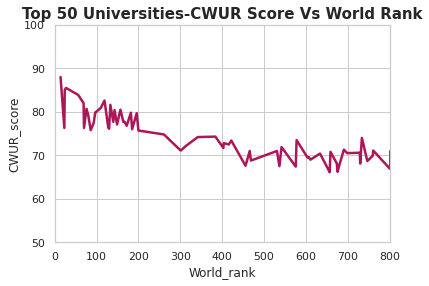

In [ ]:
sns.lineplot(data = uni[:800], x = 'World_rank', y='CWUR_score',linewidth=2.5, color='#AD1759')
plt.title("Top 50 Universities-CWUR Score Vs World Rank", fontweight = 'bold', fontsize = 15)
sns.set_theme(style = "whitegrid")
plt.xlim(0,800)
plt.ylim(50,100)
plt.show()

###Finding Best Fit for UG International Students on Basis of Average Fees

*   For the top 20 Universities favoured by International Students mostly have Urban Setting.
*   On Average, The fees charged for post-graduation is between 10000-14000 pounds.
*   On Comparing with Student satisfaction, Abertay University tend to outperform other Universities.




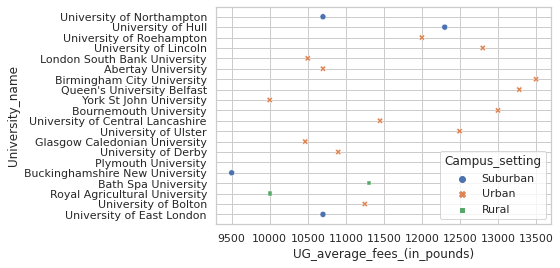

In [ ]:
sort_intl = uni.sort_values(by = "International_students", ascending = False)
sort_intl
sns.scatterplot(x = 'UG_average_fees_(in_pounds)',y= 'University_name',data= sort_intl[:20] ,hue = 'Campus_setting' ,style = 'Campus_setting')
sns.set_theme(style = "whitegrid")
plt.show()

### Finding Best Fit for PG International Students on Basis of Average Fees
*   For the top 20 Uni favoured by International Students mostly have Urban Setting.
*   On Average, The fees charged for post-graduation is between 15000-13000 pounds.
*   On Comparing with Student satisfaction, Abertay University tend to outperform other Universities.
*   It can be concluded that Post-Graduation is less costly than UG studies in UK.





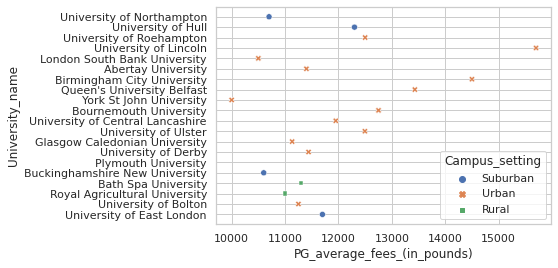

In [ ]:
sns.scatterplot(x = 'PG_average_fees_(in_pounds)',y= 'University_name',data= sort_intl[:20] ,hue = 'Campus_setting' ,style = 'Campus_setting')
sns.set_theme(style = "darkgrid")
plt.show()

### Analysing satisfaction Level of International Students on their Academics

Aberaty University is found to stand on the grounds of student expectation, with the highest percentage to Student satisfaction. It can be concluded that Urban Based universities tend to do better than Suburban and rural based Univeristies.

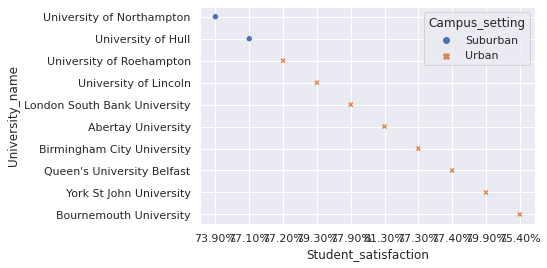

In [ ]:
sort_intl
sns.scatterplot(x = 'Student_satisfaction',y= 'University_name',data= sort_intl[:10] ,hue = 'Campus_setting' ,style = 'Campus_setting')
sns.set_theme(style = "whitegrid")
plt.show()

### Finding Estimated Cost Of Living For International Students in Top University Favoured By Them


For International Students, the Estimated Cost of Living is found to be most student friendly in Birmingham City University...

With Albertray University in second effective choice in terms of Estimated Cost of Living

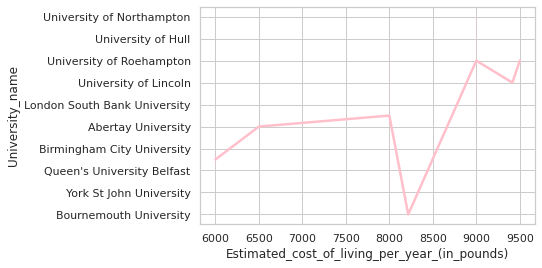

In [ ]:
sns.lineplot(x = 'Estimated_cost_of_living_per_year_(in_pounds)',y= 'University_name',data= sort_intl[:10], linewidth = 2.5, color='pink')
sns.set_theme(style = "darkgrid")
plt.show()

### Finding Share Of Colleges Based in London on Basis of ILETS Score

From the pie chart, it can be concluded that almost all Universities have equal Minimum IELTS Score requirement.

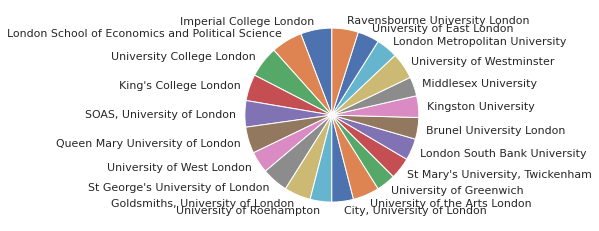

In [ ]:
uni_lon = uni.groupby('Region').get_group("London")
plt.pie(uni_lon['Minimum_IELTS_score'], labels = uni_lon["University_name"] , startangle = 90 , shadow = False)
plt.show()

### Finding the Role of Campus setting in UG Student Satisfaction

On Evaluating the ROI in terms of Student Satisfaction, it is found that Urban Universities tends to charge more fees for Under-Graduation 
but also yields higher rate of Student Satisfaction.

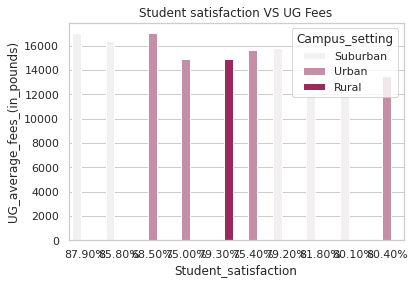

In [ ]:
sns.barplot(data=uni[:10], x='Student_satisfaction', y='UG_average_fees_(in_pounds)', hue = "Campus_setting", color='#AD1759')
sns.set_theme(style = "whitegrid") 
plt.title("Student satisfaction VS UG Fees")
plt.show()

### Finding Role of UK rank and its location in Student Enrollment 

Sub-Urban University has higher rate of student enrollment even with lower UK ranks...


East Midlands, North East England , London , West Midlands , North West England has the Highest Rate of student Enrollment

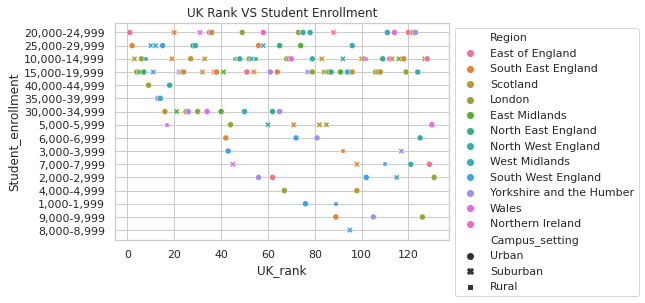

In [ ]:
ax = sns.scatterplot(data=uni, x='UK_rank', y='Student_enrollment', hue = "Region", style = 'Campus_setting') 
sns.move_legend(ax, loc = "upper left", bbox_to_anchor = (1,1))
sns.set_theme()
plt.title("UK Rank VS Student Enrollment")
plt.show()

### Multivariate Analysis

---



For multivariate analysis, we can the pairplot()method of seaborn module. 
We can also use it for the multiple pairwise bivariate distributions in a dataset.

Here, We have use IELTS Score to highlight the graphs against varoius parameters discussed above.

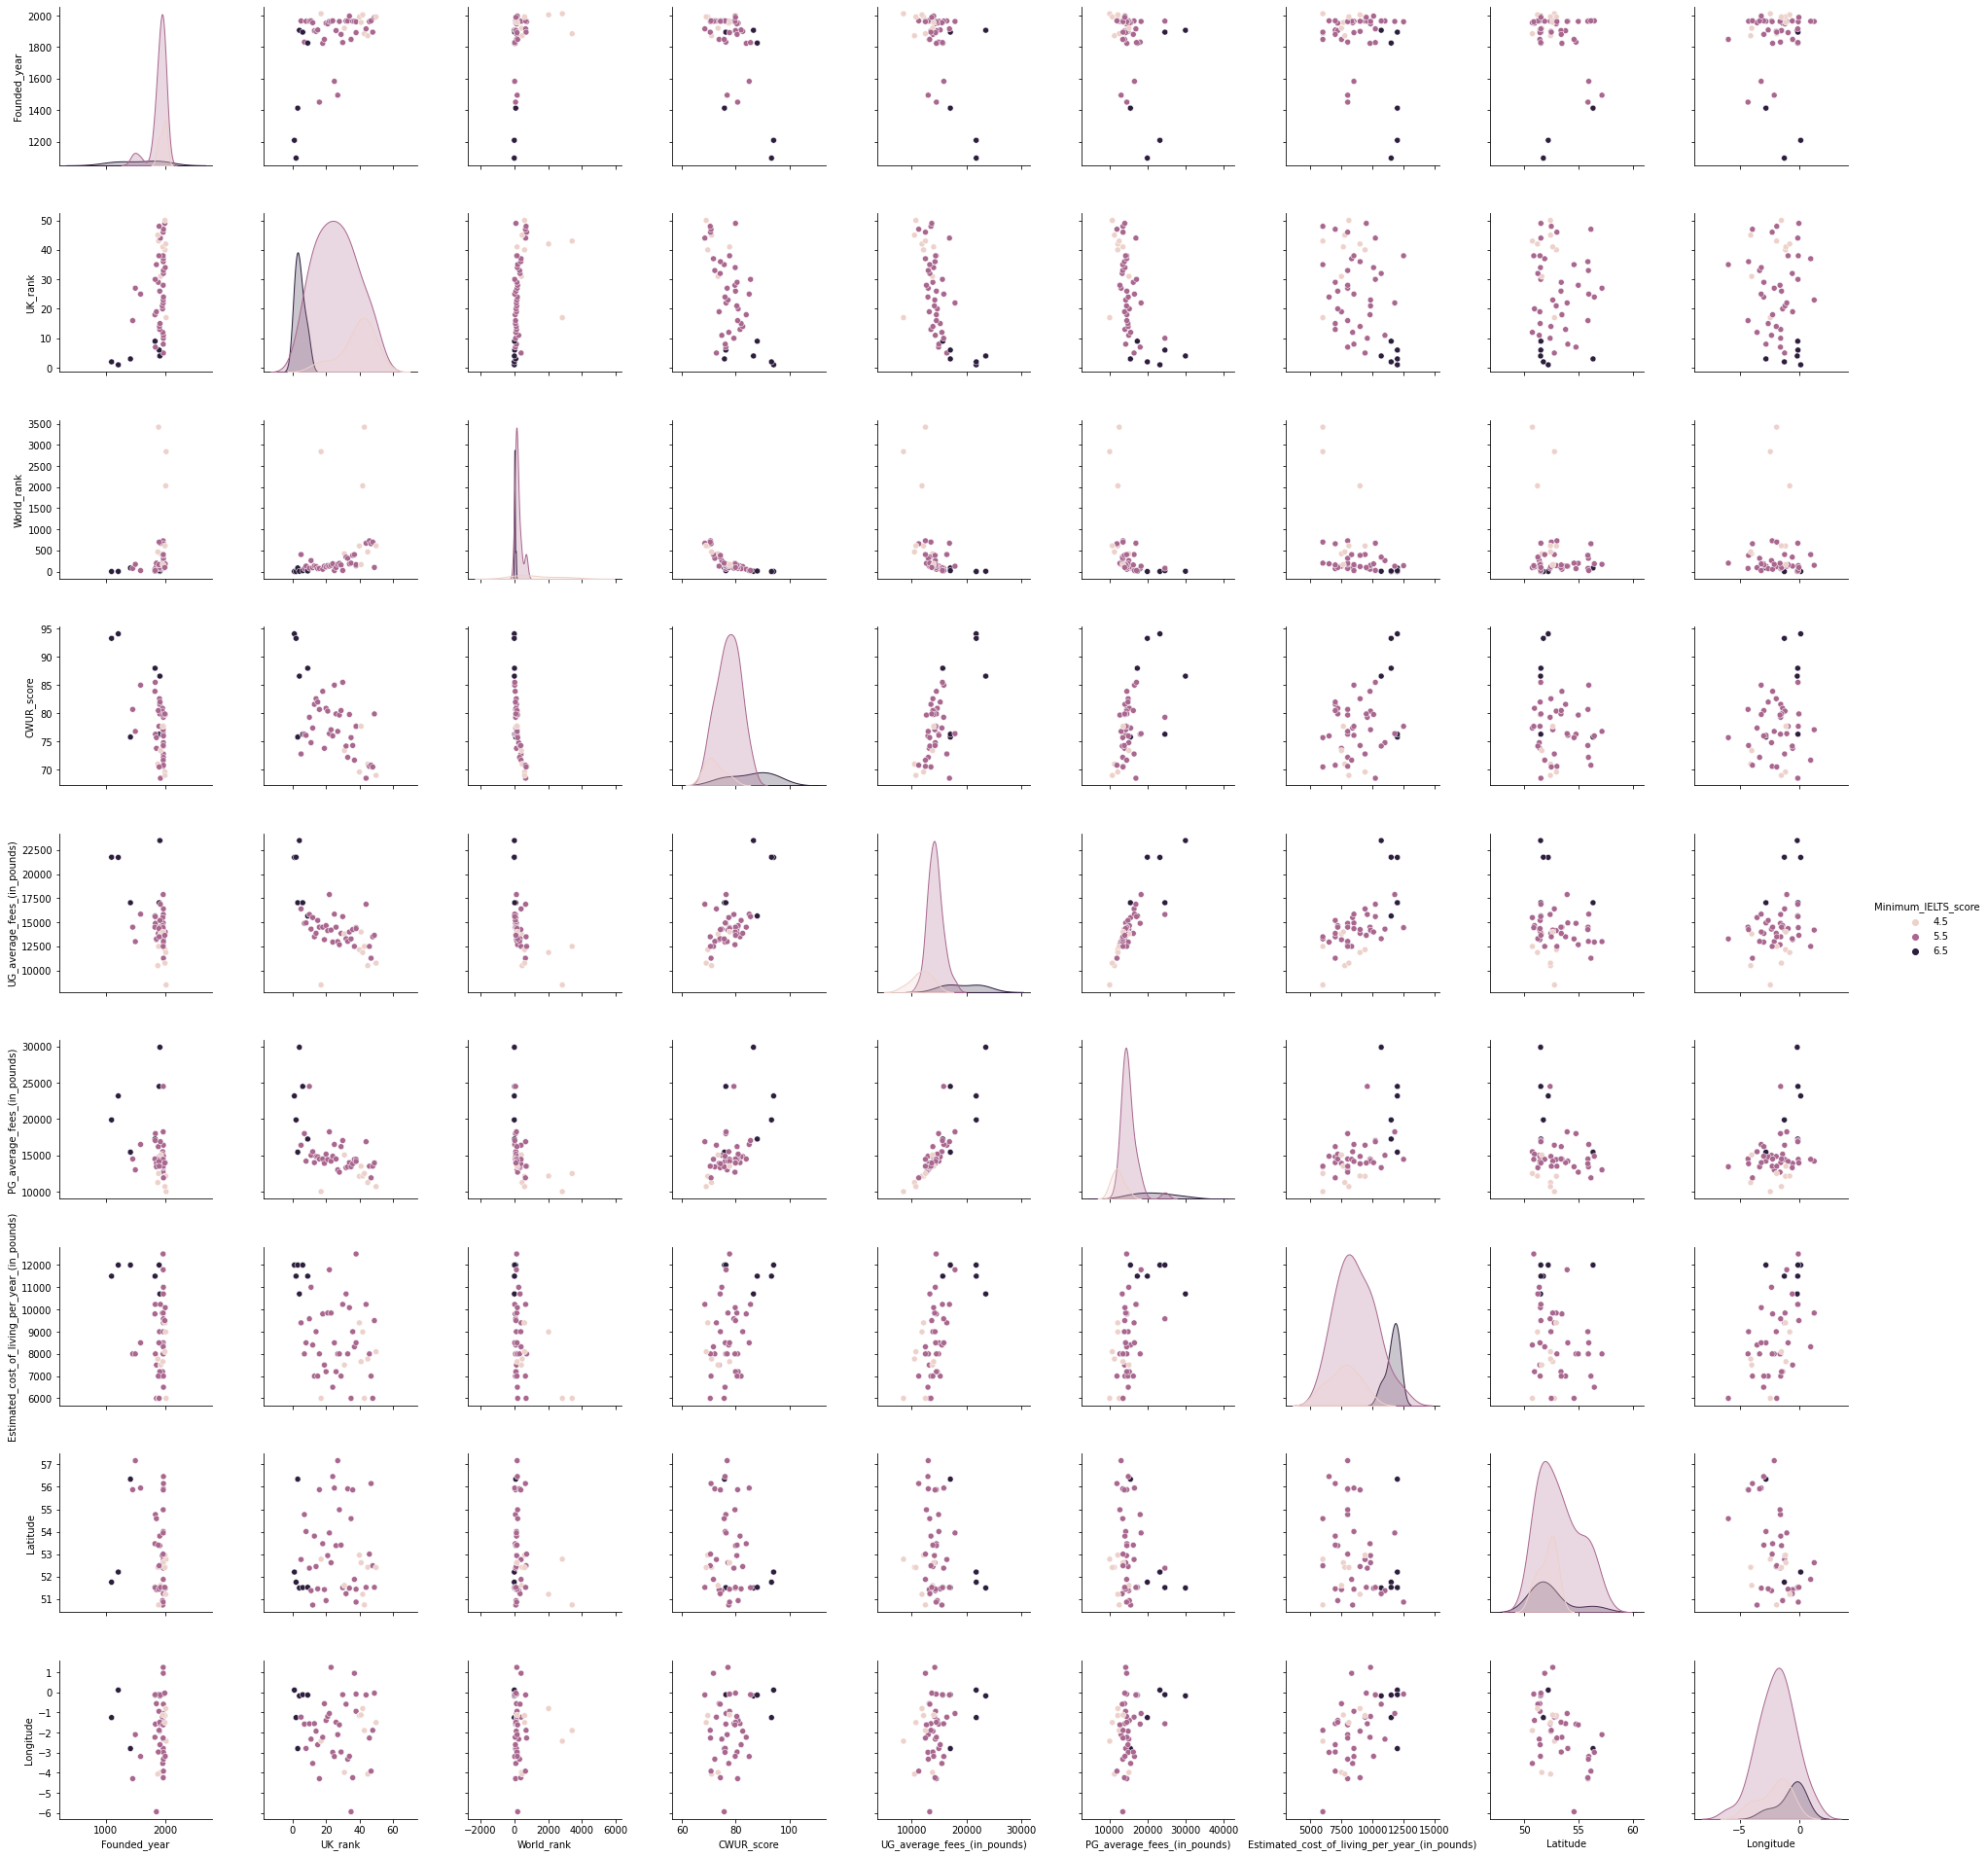

In [ ]:
sns.pairplot(uni[:50], hue='Minimum_IELTS_score', height=3)
plt.show()

# Handling Outliers

---



An Outlier is a data-item/object that deviates significantly from the rest of the objects. In the given dataset, UG fees plays a crucial role in selection of right university. By removing, outliers which have high fees can result into the right pool of universities.

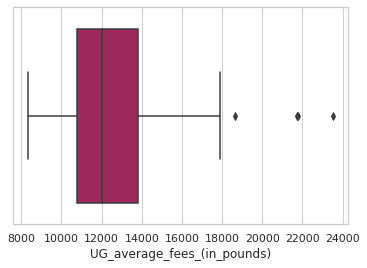

In [ ]:
sns.boxplot(x='UG_average_fees_(in_pounds)', data=uni, color='#AD1759')

In the above graph, the values above 18,000 are acting as outliers. The removal process is the data frame same as removing a data item from the panda’s dataframe.

### Removing Outliers

---
We will detect the outliers using IQR method and then remove them. Also draw the Boxplot to see if the outliers are removed or not.

Old Shape:  (124, 21)
New Shape:  (123, 21)


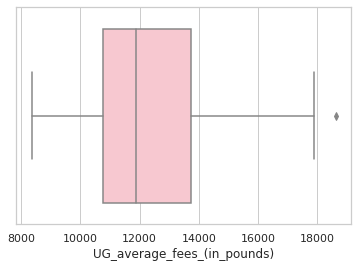

In [ ]:
Q1 = np.percentile(uni['UG_average_fees_(in_pounds)'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(uni['UG_average_fees_(in_pounds)'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", uni.shape)
  
# Upper bound
upper = np.where(uni['UG_average_fees_(in_pounds)'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(uni['UG_average_fees_(in_pounds)'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
uni.drop(upper[0], inplace = True)
uni.drop(lower[0], inplace = True)
  
print("New Shape: ", uni.shape)
  
sns.boxplot(x='UG_average_fees_(in_pounds)', data=uni, color='pink')
plt.show()